In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns

import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM,GRU
from keras.optimizers import RMSprop
from sklearn import preprocessing

Using TensorFlow backend.


In [3]:
dailyDF  = pd.read_csv('..\Data\daily.csv')
print(dailyDF.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [4]:
def find_na(data, column_name):
    dataX = data[column_name]
    null_sum_column = dataX.isnull().sum(axis = 0)
    percent_NA_column = ((( null_sum_column / len(dataX)) * 100 ).round(2))
    print(f'Percentage of NA in column {column_name} is {percent_NA_column}')
    
def outlier_percetage(data , column_name):
    lower =  data[column_name].quantile(.15)
    upper =  data[column_name].quantile(.85)
    outlier_per = ((len(data[data[column_name] < lower]) +  len(data[data[column_name] > upper])) / len(data))*100
    print(f'Percentage of outlier in column {column_name} is {outlier_per}')
    

## Percentage NA

In [5]:
for column_name in dailyDF.columns:
    find_na(dailyDF,column_name)

Percentage of NA in column instant is 0.0
Percentage of NA in column dteday is 0.0
Percentage of NA in column season is 0.0
Percentage of NA in column yr is 0.0
Percentage of NA in column mnth is 0.0
Percentage of NA in column holiday is 0.0
Percentage of NA in column weekday is 0.0
Percentage of NA in column workingday is 0.0
Percentage of NA in column weathersit is 0.0
Percentage of NA in column temp is 0.0
Percentage of NA in column atemp is 0.0
Percentage of NA in column hum is 0.0
Percentage of NA in column windspeed is 0.0
Percentage of NA in column casual is 0.0
Percentage of NA in column registered is 0.0
Percentage of NA in column cnt is 0.0


## Percentage Outlier 

In [6]:
# list of continues columns
conti_col = ['temp','atemp','hum','windspeed','casual','registered','cnt']
for col in conti_col:
    outlier_percetage(dailyDF,col)

Percentage of outlier in column temp is 29.958960328317374
Percentage of outlier in column atemp is 30.095759233926128
Percentage of outlier in column hum is 30.095759233926128
Percentage of outlier in column windspeed is 30.095759233926128
Percentage of outlier in column casual is 30.095759233926128
Percentage of outlier in column registered is 30.095759233926128
Percentage of outlier in column cnt is 30.095759233926128


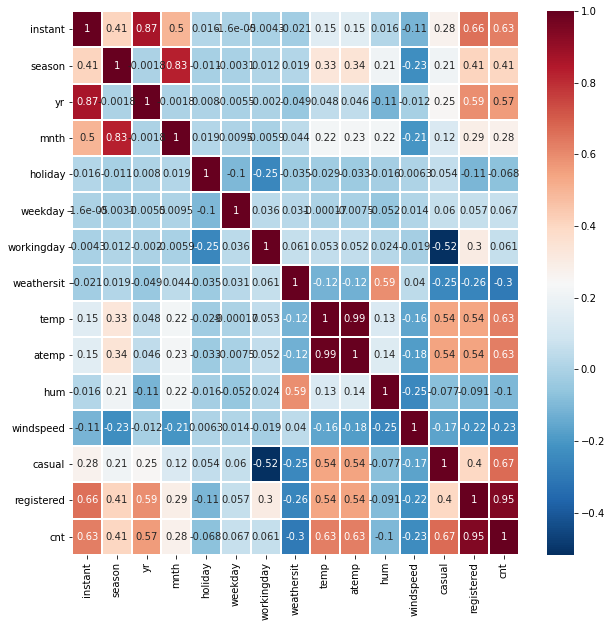

In [7]:
## co-relation between columns
import seaborn as sb
pearsoncorr = dailyDF.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10)) 
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1, ax=ax)
plt.show()

According to the coorelation plot, we can see that five variables like season, temp, casual and registered are highly correlated to the number of total rental bikes.Hence, We will perform model analysis only based on these columns

## Normalization of dailyDF

In [8]:
conti_col = ['temp','atemp','hum','windspeed','casual','registered','cnt']
def normalize(data,column):
    x = data[column].values.reshape(-1,1) #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data[column] = x_scaled
    
for column in conti_col:
    normalize(dailyDF,column)
    normalize(dailyDF,column)

In [9]:
col_x = ['season','temp','casual','registered']
optimize_data_x = dailyDF[col_x]
optimize_data_y = dailyDF['cnt']
X_train, X_test, y_train, y_test = train_test_split(optimize_data_x, optimize_data_y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
predict_y = reg.predict(X_test)
mae = mean_absolute_error(y_test, predict_y, multioutput='raw_values')
print(f'Mean Absolute Error for linear regression model {mae}')
print();print();
for index,col in enumerate(col_x):
    print(f'Coeff for {col} is {reg.coef_[index]}')
print();print();
print(f'Intercept for regression is {reg.intercept_}')

Mean Absolute Error for linear regression model [1.47180076e-16]


Coeff for season is 7.762384908012262e-17
Coeff for temp is 2.220446049250313e-16
Coeff for casual is 0.3920846755637368
Coeff for registered is 0.7968246663598699


Intercept for regression is 1.1102230246251565e-16


## Original V/S Predicted Values
We can see that predicted values overlapped the original values. Hence variables like season, temp, casual and registered are sufficient to predict the rental bikes

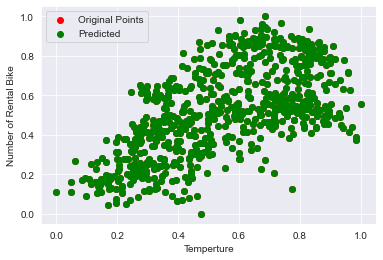

In [10]:
sns.set_style("darkgrid")
plt.scatter(optimize_data_x['temp'],optimize_data_y,color = 'r',label = 'Original Points')
plt.scatter(optimize_data_x['temp'],reg.predict(optimize_data_x),color = 'g',label = 'Predicted')
plt.xlabel('Temperture')
plt.ylabel('Number of Rental Bike')
plt.legend()
plt.show()

## Effect of other variables on bike rental count
As we saw in correlation plot that casual and registered are highly coorelated with number of bike rental. If we use only these two variable in regression then they are sufficient to predict the expected output. So, to check other variable dependency on bike rental number. We need to check other variable dependency on the bike rental count.

In [11]:
col_x = ['season','temp','workingday','weekday','mnth']
optimize_data_x = dailyDF[col_x]
optimize_data_y = dailyDF['cnt']
X_train, X_test, y_train, y_test = train_test_split(optimize_data_x, optimize_data_y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
predict_y = reg.predict(X_test)
mae = mean_absolute_error(y_test, predict_y, multioutput='raw_values')
print(f'Mean Absolute Error for linear regression model {mae}')
print();print();
for index,col in enumerate(col_x):
    print(f'Coeff for {col} is {reg.coef_[index]}')
print();print();
print(f'Intercept for regression is {reg.intercept_}')

Mean Absolute Error for linear regression model [0.1429861]


Coeff for season is 0.05882190244509919
Coeff for temp is 0.5586180865022388
Coeff for workingday is 0.017071310961414298
Coeff for weekday is 0.008577212326579346
Coeff for mnth is -0.006534777057671914


Intercept for regression is 0.07245788896416772


## Original V/S Predicted Values

As we can see that these variables 'season','temp','workingday','weekday' and 'mnth' are important parameter if we remove casual and registered user count from model fits. So, we determined that these factor, we need to be consider for future prediction of bike rental count. 

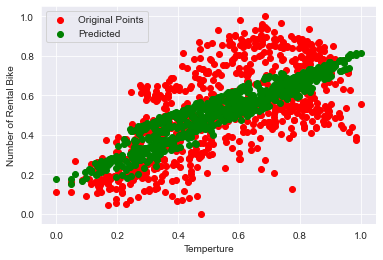

In [12]:
sns.set_style("darkgrid")
plt.scatter(optimize_data_x['temp'],optimize_data_y,color = 'r',label = 'Original Points')
plt.scatter(optimize_data_x['temp'],reg.predict(optimize_data_x),color = 'g',label = 'Predicted')
plt.xlabel('Temperture')
plt.ylabel('Number of Rental Bike')
plt.legend()
plt.show()

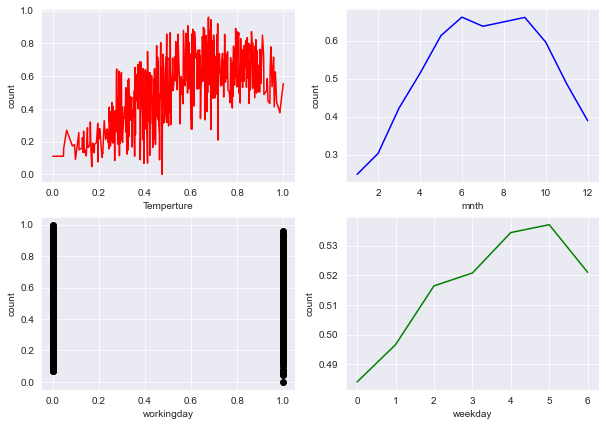

In [13]:
col_x = ['temp','workingday','weekday','mnth']
sns.set_style("darkgrid")
plt.subplots(figsize=(10,7)) 
plt.subplot(2,2,1)
plt.plot(np.sort(dailyDF['temp'].unique()),dailyDF.groupby(by = 'temp', axis = 0,sort=True).mean()['cnt'],color = 'r',label = 'Original Points')
plt.xlabel('Temperture')
plt.ylabel('count')


plt.subplot(2,2,2)
plt.plot(np.sort(dailyDF['mnth'].unique()),dailyDF.groupby(by = 'mnth', axis = 0,sort=True).mean()['cnt'],color = 'b',label = 'Original Points')
plt.xlabel('mnth')
plt.ylabel('count')


plt.subplot(2,2,3)
plt.scatter(dailyDF['workingday'],dailyDF['cnt'],color = 'black',label = 'Original Points')
plt.xlabel('workingday')
plt.ylabel('count')


plt.subplot(2,2,4)
plt.plot(np.sort(dailyDF['weekday'].unique()),dailyDF.groupby(by = 'weekday', axis = 0,sort=True).mean()['cnt'],color = 'g',label = 'Original Points')
plt.xlabel('weekday')
plt.ylabel('count')

plt.show()

## Addition model DeepNN

### Model Using variables  season, temp, workingday, weekday and mnth

In [14]:
history = {}
col_x = ['season','temp','workingday','weekday','mnth']
optimize_data_x = dailyDF[col_x]
optimize_data_y = dailyDF['cnt']
X_train, X_test, y_train, y_test = train_test_split(optimize_data_x, optimize_data_y, test_size=0.2)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(0.001), loss='mae',metrics=['mae'])
history['Model 1'] = model.fit(X_train, y_train, validation_split = 0.2, epochs=1000, verbose = 0)
score =  model.evaluate(X_test,y_test)
predicted1 = model.predict(X_test)
print(f'MAE is {score}')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
147/147 [==============================] - 0s 0us/step
MAE is [0.14440775515676355, 0.14440776407718658]


### Model using variables season,temp,casual and registered

In [16]:
col_x = ['season','temp','casual','registered']
optimize_data_x = dailyDF[col_x]
optimize_data_y = dailyDF['cnt']
X_train, X_test, y_train, y_test = train_test_split(optimize_data_x, optimize_data_y, test_size=0.2)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(0.001), loss='mae',metrics=['mae'])
history['Model 2'] = model.fit(X_train, y_train, validation_split = 0.2, epochs=1000, verbose = 0)
score =  model.evaluate(X_test,y_test)
predicted2 = model.predict(X_test)
print(f'MAE is {score}')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________
147/147 [==============================] - 0s 27us/step
MAE is [0.008195406731953021, 0.008195406757295132]


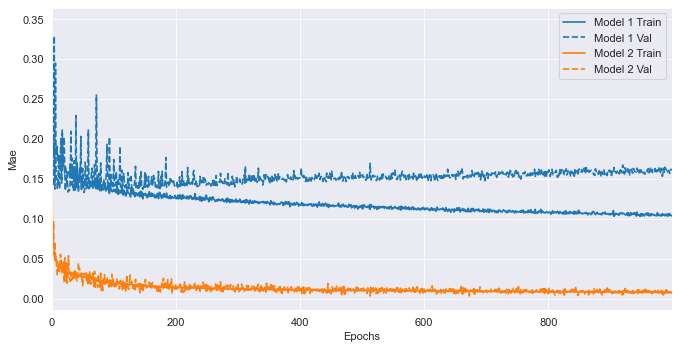

In [17]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plotter = tfdocs.plots.HistoryPlotter(metric = 'mae')
plotter.plot(history)

As we can analyze from above graph that model is more accurate due high correlation of causal and registered user on count of bike hired. But We want to analyze other factors also like season, temp, working days, week days and month of the year. We have not include year as year is factor in past and will not be a factor in future. If we are considering only variables for model 1 (in blue). We can see that we are very likely to predict counts. We have reached to the Mean absolute error of 0.10 which can be consider as well performance. I have selected the deepNN for this problem because this problem has many discrete variable as well as continues variable. Its very hard to fit a ML model with precision. 

### Prediction by Model 1 and Model 2

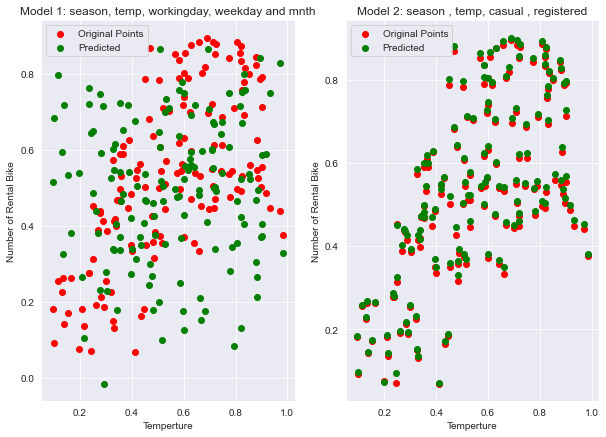

In [19]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,7)) 
plt.subplot(1,2,1)
plt.scatter(X_test['temp'], y_test,color = 'r',label = 'Original Points')
plt.scatter(X_test['temp'],predicted1,color = 'g',label = 'Predicted')
plt.xlabel('Temperture')
plt.ylabel('Number of Rental Bike')
plt.title('Model 1: season, temp, workingday, weekday and mnth')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_test['temp'], y_test,color = 'r',label = 'Original Points')
plt.scatter(X_test['temp'],predicted2,color = 'g',label = 'Predicted')
plt.xlabel('Temperture')
plt.ylabel('Number of Rental Bike')
plt.title('Model 2: season , temp, casual , registered')
plt.legend()

plt.show()

From above graph we can see that linear model is able to predict the count better than DeepNN. Although model 1 parameter ( season, temp, workingday, weekday and mnth) together are very important to predict count. But due to fast execution of linear model than DeepNN. I will prefer to use linear model because problem is not that complex. 